<a href="https://colab.research.google.com/github/yuva-01997656/cs480student/blob/main/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

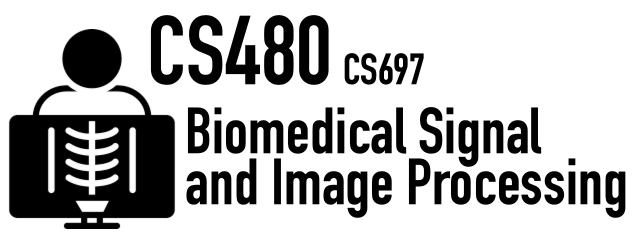
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [ ]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/US Assignments/xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [ ]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!
# This will display the width, height and how many color channels the image has 


The dimensions of the image are (1858, 2090)
 
 Displaying the Image
 


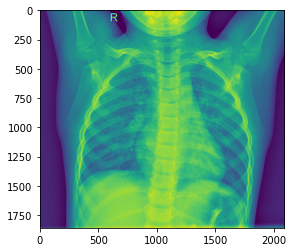

In [ ]:
# TODO: YOUR CODE
print("The dimensions of the image are", img.shape)
print(" ")
print(" Displaying the Image")
print(" ")
imshow(img)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [ ]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER

Operation 1: 

The data is read and the loaded images are converted to greyscale before being resized to 300x300 pixels.

Operation 2 : 

The resized image pixels are replaced with numpy arrays in Operation 2.

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

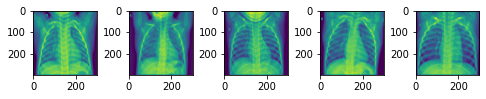

In [ ]:
# First 5 Normal Images
fig = plt.figure(figsize=(8,6))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(normal_images[i])
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

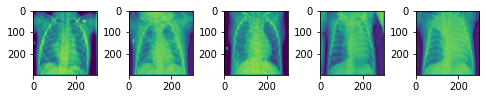

In [ ]:
# First 5 Pneumonia Images
fig = plt.figure(figsize=(8,6))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(pneumonia_images[i])
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [ ]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
# TODO
training_target = np.zeros((TRAINING_COUNT*2,1), dtype=int)

In [ ]:
for i in range(0, TRAINING_COUNT):
  training_target[i][0] = 0

In [ ]:
for i in range(TRAINING_COUNT, len(training_target)):
  training_target[i][0] = 1

In [ ]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
# TODO
testing_target = np.zeros((TESTING_COUNT*2,1), dtype=int)

In [ ]:
for i in range(0, TESTING_COUNT):
  training_target[i][0] = 0

In [ ]:
for i in range(TESTING_COUNT, len(testing_target)):
  testing_target[i][0] = 1

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [ ]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [ ]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER


Random forest is a supervised learning algorithm. The "forest" it generates is an ensemble of decision trees trained using the "bagging" method. The bagging method is based on the notion that combining learning models improves the overall outcome. Random forest builds and merges multiple decision trees to produce a more accurate and stable prediction.
Random forest has a significant advantage in that it can be used for both classification and regression problems, which are common in most machine learning systems today.

In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score(testing_data, testing_target)

0.9375

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?


To evaluate the performance of novel classifiers, accuracy scrore is always used. The score of 0.85 - 0.90 is acceptable, but it is insufficient when considering the model's use case. Because the model must predict the presence of pnemonia, incorrect predictions could have serious consequences.

In [ ]:

 # TODO: YOUR ANSWER

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [ ]:
pred = clf.predict(testing_data)
print(pred)
print('_'*100)

import pandas as pd
missclassify = clf.predict(testing_data) != testing_target
print(missclassify)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
____________________________________________________________________________________________________
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


In [ ]:
predictions = clf.predict(testing_data).tolist()
missclassify_normal = []
missclassify_pnemonia = []

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER

In [ ]:
for i in range(0,len(predictions)):
  j = predictions[i]
  k = testing_target[i][0]
  if j != k:
    if i<40:
      missclassify_normal.append(i+60)
    else:
      missclassify_pnemonia.append(i+20)

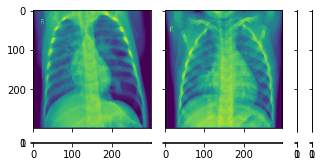

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(5.,5.))
imgs = ImageGrid(fig, 111, nrows_ncols=(2,4), axes_pad=0.2)
for ax, im in zip(imgs, missclassify_pnemonia):
  ax.imshow(pneumonia_images[im])

plt.show()

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER

There are many ways to improve, 
1. By using stratified cross-validation is especially important when there are large imbalances in the classes; for example, if all of the new images you added are "normal," it's not surprising that they don't help much. Second, if computationally feasible, a grid search to optimise the hyperparameters of the models would be advantageous.
2. Use a hyperparameter optimization technique, such as auto-sklearn in Python, as an alternative. The hyperparameters can then be optimised using AUC, F1, or another metric that reflects performance rather than accuracy. Regardless of which metric we use, this should improve your performance.

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw